In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
name = 'Test'

path = '../Assets/Resources/Intentions/DataSimulation/Bloc/Verif/'
path2 = '-Basil_SpeedSet40Test'
contribMin = 0.2
contribMax = 0.25
increment = 0.05

realTest = True

In [45]:
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracySummary = None
accuracySummary = pd.DataFrame()

accuracyTarget = None
accuracyTarget = pd.DataFrame()

accuracyCoVR = None
accuracyCoVR = pd.DataFrame()


OneTarget = None
OneTarget = pd.DataFrame()

TwoTargets = None
TwoTargets = pd.DataFrame()
ThreeTargets = None
ThreeTargets = pd.DataFrame()
FourTargets = None
FourTargets = pd.DataFrame()
FiveTargets = None
FiveTargets = pd.DataFrame()

oneTargetSummary = None
oneTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
twoTargetSummary = None
twoTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
threeTargetSummary = None
threeTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fourTargetSummary = None
fourTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fiveTargetSummary = None
fiveTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracyOne = None
accuracyTwo = None
accuracyThree = None
accuracyFour = None
accuracyFive = None

accuracyOne = pd.DataFrame()
accuracyTwo = pd.DataFrame()
accuracyThree = pd.DataFrame()
accuracyFour = pd.DataFrame()
accuracyFive = pd.DataFrame()
    

for i in range(int(contribMin*1000), int(contribMax*1000 + increment*1000), int(increment*1000)):
    contribDist = i
    contribAngle = 1000 - contribDist
    
# FOR I IN RANGE CONTRIBMIN CONTRIBMAX INCREMENT 0.05: do all and get summary
    contribDist = contribDist/1000
    contribAngle = contribAngle/1000
    Contrib01 = None
    Contrib01 = pd.read_csv(path + str(contribDist) + '-' + str(contribAngle) + path2 + '.csv', sep = ";", decimal = ',')
    
    contribDist = float(contribDist)
    contribAngle = float(contribAngle)
    
    list_names = Contrib01.columns.values
    for i in range(0, math.floor(Contrib01.columns.size/2)):
        del Contrib01[list_names[2*i]]

        Contrib01.columns.values[i] = list_names[2*i]
        Contrib01.index = Contrib01['Time']
    del Contrib01['Time']

    
    targetCoVR = None
    targetCoVR = pd.DataFrame()
    
    targetOne = None
    targetTwo = None
    targetThree = None
    targetFour = None
    targetFive = None
    
    targetOne = pd.DataFrame()
    targetTwo = pd.DataFrame()
    targetThree = pd.DataFrame()
    targetFour = pd.DataFrame()
    targetFive = pd.DataFrame()
    
    Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
    Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

    Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]


    Comparison = None
    Comparison = pd.DataFrame()
    
    j = 0
    k = 0
    time_diff = 0
    list_time = []
    list_i = []
    list_i_1 = []
    #for i in range(20, math.floor(Contrib01.index.size/1.6)):
    for i in range(20, Contrib01.index.size):
        if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
            k = float(Contrib01.index.values[i])
        if ((float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1]))):
            #and (abs(float(Contrib01['PosHandX'].values[i-1])) - abs(float(Contrib01['PosTargetX'].values[i-1])) < 0.05) and float(Contrib01['TargetToTouch.z'].values[i]) != float(Contrib01['TargetToTouch.z'].values[i-1]) and (abs(float(Contrib01['PosHandZ'].values[i-1])) - abs(float(Contrib01['PosTargetZ'].values[i-1])) < 0.05)):
            j = j + 1
            list_i.append(i-1)
            list_i_1.append(i-2)
            time_diff = float(Contrib01.index.values[i]) - k
            list_time.append(time_diff)

    Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
    # MEASURE DISTANCE POSHANDUSER AND CoVROPT
    Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosProxyXZ'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

    if(realTest):
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
    else:
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosProxyXZ']
    #Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

    Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
    Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
    Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()


    Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['TimeDiffIntentionKnown'] = [list_time[i] for i in range(0,j)]
    #GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

    Comparison['NbTargetsInScene'] = [float(Contrib01['NbTargetInScene'].values[list_i[i]]) for i in range(0,j)]
    cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)
    
    posDif = [float(Contrib01['PosCoVR_EncXZ'].values[list_i[i]]) - float(Contrib01['PosCoVR_EncXZ'].values[list_i_1[i]]) for i in range(0,j)]
    #cond_inPlace = [(posDif[i] < 0.005) for i in range(0,j)]
    
    
    Comparison['BoolInPlace'] = cond_inPlace
    #print(Comparison['BoolInPlace'])
    #Supposed to be the same! (and is)
    #Comparison['BoolInPlace'] = [bool(Contrib01['CoVRinPlace'].values[list_i[i]]) for i in range(0,j)]
    #THIS IS THE ONE
    
    
    
    # SUMMARY: cond_inPlace valuecounts
    tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
    #j
    #print(Comparison['TimeDiffIntentionKnown'])
    dict_Dist = {}
    dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
    #print(dict)
    accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
    accuracyCoVR.columns = [contribDist]
    
    dict_Target = {}
    dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

    targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
    targetCoVR.columns = [contribDist]    
    Comparison['Time'] = [list_i[i] for i in range(0,j)]
    
    OneTarget = Comparison[Comparison['NbTargetsInScene'] == 1.0]
    tauxOne = (OneTarget['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/OneTarget['BoolInPlace'].shape * 100
    
    TwoTargets = Comparison[Comparison['NbTargetsInScene'] == 2.0]
    tauxTwo = (TwoTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/TwoTargets['BoolInPlace'].shape * 100
    
    ThreeTargets = Comparison[Comparison['NbTargetsInScene'] == 3.0]
    tauxThree = (ThreeTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/ThreeTargets['BoolInPlace'].shape * 100
    
    FourTargets = Comparison[Comparison['NbTargetsInScene'] == 4.0]
    tauxFour = (FourTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FourTargets['BoolInPlace'].shape * 100
    
    FiveTargets = Comparison[Comparison['NbTargetsInScene'] == 5.0]
    tauxFive = (FiveTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FiveTargets['BoolInPlace'].shape * 100
    dict_oneTarget = {}
    dict_oneTarget = {OneTarget['AbsoluteDistanceToTarget'].describe().index[i] : OneTarget['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, OneTarget.describe().index.size)}
    dict_twoTarget = {}
    dict_twoTarget = {TwoTargets['AbsoluteDistanceToTarget'].describe().index[i] : TwoTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, TwoTargets.describe().index.size)}
    dict_threeTarget = {}
    dict_threeTarget = {ThreeTargets['AbsoluteDistanceToTarget'].describe().index[i] : ThreeTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, ThreeTargets.describe().index.size)}
    dict_fourTarget = {}
    dict_fourTarget = {FourTargets['AbsoluteDistanceToTarget'].describe().index[i] : FourTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FourTargets.describe().index.size)}
    dict_fiveTarget = {}
    dict_fiveTarget = {FiveTargets['AbsoluteDistanceToTarget'].describe().index[i] : FiveTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FiveTargets.describe().index.size)}
    
    targetOne = pd.DataFrame.from_dict(dict_oneTarget, orient = 'index')
    targetOne.columns = [contribDist]
    targetTwo = pd.DataFrame.from_dict(dict_twoTarget, orient = 'index')
    targetTwo.columns = [contribDist]
    targetThree = pd.DataFrame.from_dict(dict_threeTarget, orient = 'index')
    targetThree.columns = [contribDist]
    targetFour = pd.DataFrame.from_dict(dict_fourTarget, orient = 'index')
    targetFour.columns = [contribDist]   
    targetFive = pd.DataFrame.from_dict(dict_fiveTarget, orient = 'index')
    targetFive.columns = [contribDist]   
    
    accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
    accuracyTarget = accuracyTarget.append(targetCoVR.transpose())
    
    accuracyOne = accuracyOne.append(targetOne.transpose())
    accuracyTwo = accuracyTwo.append(targetTwo.transpose())
    accuracyThree = accuracyThree.append(targetThree.transpose())
    accuracyFour = accuracyFour.append(targetFour.transpose())
    accuracyFive = accuracyFive.append(targetFive.transpose())
    
    summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
    
    oneTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxOne[True], 'MeanDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : OneTarget['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : OneTarget['BoolInPlace'].shape})
    twoTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxTwo[True], 'MeanDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : TwoTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : TwoTargets['BoolInPlace'].shape})
    threeTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxThree[True], 'MeanDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : ThreeTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : ThreeTargets['BoolInPlace'].shape})
    fourTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFour[True], 'MeanDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FourTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FourTargets['BoolInPlace'].shape})
    fiveTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFive[True], 'MeanDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FiveTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FiveTargets['BoolInPlace'].shape})
    
accuracySummary = accuracySummary.transpose()
accuracyTarget = accuracyTarget.transpose()

accuracyOne = accuracyOne.transpose()
accuracyTwo = accuracyTwo.transpose()
accuracyThree = accuracyThree.transpose()
accuracyFour = accuracyFour.transpose()
accuracyFive = accuracyFive.transpose()

In [46]:
summaryPd

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.20         74.0            0.131559           0.264025   
0.25         84.0            0.072445           0.152692   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.20              0.143943             0.255305            4.305322   
0.25              0.085707             0.147977            4.504308   

      CheckNbTargets  MaxSpeed  
0.20            50.0       NaN  
0.25            50.0       NaN

In [47]:
oneTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.20        100.0            0.012721           0.014407   
0.25        100.0            0.010958           0.013117   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.20              0.032653             0.025734            3.130745   
0.25              0.031109             0.026010            3.335360   

     CheckNbTargets  MaxSpeed  
0.20          (10,)       NaN  
0.25          (10,)       NaN

In [48]:
twoTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.20         70.0            0.074852           0.095712   
0.25         90.0            0.037941           0.038556   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.20              0.081571             0.082974            3.975368   
0.25              0.047018             0.036996            4.212580   

     CheckNbTargets  MaxSpeed  
0.20          (10,)       NaN  
0.25          (10,)       NaN

In [49]:
threeTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.20        100.0            0.021556           0.020494   
0.25        100.0            0.019485           0.023785   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.20              0.044776             0.032983            6.196617   
0.25              0.043715             0.040649            6.507600   

     CheckNbTargets  MaxSpeed  
0.20          (10,)       NaN  
0.25          (10,)       NaN

In [50]:
fourTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.20         70.0             0.13244           0.199637   
0.25         60.0             0.10692           0.153544   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.20              0.138645             0.183295            3.817445   
0.25              0.112789             0.144933            3.856250   

     CheckNbTargets  MaxSpeed  
0.20          (10,)       NaN  
0.25          (10,)       NaN

In [51]:
fiveTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.20         30.0            0.416224           0.455124   
0.25         70.0            0.186922           0.276792   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.20              0.422072             0.444577            4.406437   
0.25              0.193903             0.271585            4.609750   

     CheckNbTargets  MaxSpeed  
0.20          (10,)       NaN  
0.25          (10,)       NaN

In [12]:
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracySummary = None
accuracySummary = pd.DataFrame()

accuracyTarget = None
accuracyTarget = pd.DataFrame()

accuracyCoVR = None
accuracyCoVR = pd.DataFrame()


OneTarget = None
OneTarget = pd.DataFrame()

TwoTargets = None
TwoTargets = pd.DataFrame()
ThreeTargets = None
ThreeTargets = pd.DataFrame()
FourTargets = None
FourTargets = pd.DataFrame()
FiveTargets = None
FiveTargets = pd.DataFrame()

oneTargetSummary = None
oneTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
twoTargetSummary = None
twoTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
threeTargetSummary = None
threeTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fourTargetSummary = None
fourTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fiveTargetSummary = None
fiveTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracyOne = None
accuracyTwo = None
accuracyThree = None
accuracyFour = None
accuracyFive = None

accuracyOne = pd.DataFrame()
accuracyTwo = pd.DataFrame()
accuracyThree = pd.DataFrame()
accuracyFour = pd.DataFrame()
accuracyFive = pd.DataFrame()
    

for i in range(int(contribMin*1000), int(contribMax*1000 + increment*1000), int(increment*1000)):
    contribDist = i
    contribAngle = 1000 - contribDist
    
# FOR I IN RANGE CONTRIBMIN CONTRIBMAX INCREMENT 0.05: do all and get summary
    contribDist = contribDist/1000
    contribAngle = contribAngle/1000
    Contrib01 = None
    Contrib01 = pd.read_csv(path + str(contribDist) + '-' + str(contribAngle) + path2 + '.csv', sep = ";", decimal = ',')
    
    contribDist = float(contribDist)
    contribAngle = float(contribAngle)
    
    list_names = Contrib01.columns.values
    for i in range(0, math.floor(Contrib01.columns.size/2)):
        del Contrib01[list_names[2*i]]

        Contrib01.columns.values[i] = list_names[2*i]
        Contrib01.index = Contrib01['Time']
    del Contrib01['Time']

    
    targetCoVR = None
    targetCoVR = pd.DataFrame()
    
    targetOne = None
    targetTwo = None
    targetThree = None
    targetFour = None
    targetFive = None
    
    targetOne = pd.DataFrame()
    targetTwo = pd.DataFrame()
    targetThree = pd.DataFrame()
    targetFour = pd.DataFrame()
    targetFive = pd.DataFrame()
    
    Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
    Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

    Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]


    Comparison = None
    Comparison = pd.DataFrame()
    
    j = 0
    k = 0
    time_diff = 0
    list_time = []
    list_i = []
    list_i_1 = []
    for i in range(math.floor(Contrib01.index.size/1.6),Contrib01.index.size ):
        if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
            k = float(Contrib01.index.values[i])
        if ((float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1]))):
            #and (abs(float(Contrib01['PosHandX'].values[i-1])) - abs(float(Contrib01['PosTargetX'].values[i-1])) < 0.05) and float(Contrib01['TargetToTouch.z'].values[i]) != float(Contrib01['TargetToTouch.z'].values[i-1]) and (abs(float(Contrib01['PosHandZ'].values[i-1])) - abs(float(Contrib01['PosTargetZ'].values[i-1])) < 0.05)):
            j = j + 1
            list_i.append(i-1)
            list_i_1.append(i-2)
            time_diff = float(Contrib01.index.values[i]) - k
            list_time.append(time_diff)

    Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
    # MEASURE DISTANCE POSHANDUSER AND CoVROPT
    Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosProxyXZ'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

    if(realTest):
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
    else:
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosProxyXZ']
    #Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

    Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
    Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
    Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()


    Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['TimeDiffIntentionKnown'] = [list_time[i] for i in range(0,j)]
    #GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

    Comparison['NbTargetsInScene'] = [float(Contrib01['NbTargetInScene'].values[list_i[i]]) for i in range(0,j)]
    cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)
    
    posDif = [float(Contrib01['PosCoVR_EncXZ'].values[list_i[i]]) - float(Contrib01['PosCoVR_EncXZ'].values[list_i_1[i]]) for i in range(0,j)]
    #cond_inPlace = [(posDif[i] < 0.005) for i in range(0,j)]
    
    
    Comparison['BoolInPlace'] = cond_inPlace
    #print(Comparison['BoolInPlace'])
    #Supposed to be the same! (and is)
    #Comparison['BoolInPlace'] = [bool(Contrib01['CoVRinPlace'].values[list_i[i]]) for i in range(0,j)]
    #THIS IS THE ONE
    
    
    
    # SUMMARY: cond_inPlace valuecounts
    tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
    #j
    #print(Comparison['TimeDiffIntentionKnown'])
    dict_Dist = {}
    dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
    #print(dict)
    accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
    accuracyCoVR.columns = [contribDist]
    
    dict_Target = {}
    dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

    targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
    targetCoVR.columns = [contribDist]    
    Comparison['Time'] = [list_i[i] for i in range(0,j)]
    
    OneTarget = Comparison[Comparison['NbTargetsInScene'] == 1.0]
    tauxOne = (OneTarget['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/OneTarget['BoolInPlace'].shape * 100
    
    TwoTargets = Comparison[Comparison['NbTargetsInScene'] == 2.0]
    tauxTwo = (TwoTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/TwoTargets['BoolInPlace'].shape * 100
    
    ThreeTargets = Comparison[Comparison['NbTargetsInScene'] == 3.0]
    tauxThree = (ThreeTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/ThreeTargets['BoolInPlace'].shape * 100
    
    FourTargets = Comparison[Comparison['NbTargetsInScene'] == 4.0]
    tauxFour = (FourTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FourTargets['BoolInPlace'].shape * 100
    
    FiveTargets = Comparison[Comparison['NbTargetsInScene'] == 5.0]
    tauxFive = (FiveTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FiveTargets['BoolInPlace'].shape * 100
    dict_oneTarget = {}
    dict_oneTarget = {OneTarget['AbsoluteDistanceToTarget'].describe().index[i] : OneTarget['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, OneTarget.describe().index.size)}
    dict_twoTarget = {}
    dict_twoTarget = {TwoTargets['AbsoluteDistanceToTarget'].describe().index[i] : TwoTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, TwoTargets.describe().index.size)}
    dict_threeTarget = {}
    dict_threeTarget = {ThreeTargets['AbsoluteDistanceToTarget'].describe().index[i] : ThreeTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, ThreeTargets.describe().index.size)}
    dict_fourTarget = {}
    dict_fourTarget = {FourTargets['AbsoluteDistanceToTarget'].describe().index[i] : FourTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FourTargets.describe().index.size)}
    dict_fiveTarget = {}
    dict_fiveTarget = {FiveTargets['AbsoluteDistanceToTarget'].describe().index[i] : FiveTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FiveTargets.describe().index.size)}
    
    targetOne = pd.DataFrame.from_dict(dict_oneTarget, orient = 'index')
    targetOne.columns = [contribDist]
    targetTwo = pd.DataFrame.from_dict(dict_twoTarget, orient = 'index')
    targetTwo.columns = [contribDist]
    targetThree = pd.DataFrame.from_dict(dict_threeTarget, orient = 'index')
    targetThree.columns = [contribDist]
    targetFour = pd.DataFrame.from_dict(dict_fourTarget, orient = 'index')
    targetFour.columns = [contribDist]   
    targetFive = pd.DataFrame.from_dict(dict_fiveTarget, orient = 'index')
    targetFive.columns = [contribDist]   
    
    accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
    accuracyTarget = accuracyTarget.append(targetCoVR.transpose())
    
    accuracyOne = accuracyOne.append(targetOne.transpose())
    accuracyTwo = accuracyTwo.append(targetTwo.transpose())
    accuracyThree = accuracyThree.append(targetThree.transpose())
    accuracyFour = accuracyFour.append(targetFour.transpose())
    accuracyFive = accuracyFive.append(targetFive.transpose())
    
    summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
    
    oneTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxOne[True], 'MeanDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : OneTarget['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : OneTarget['BoolInPlace'].shape})
    twoTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxTwo[True], 'MeanDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : TwoTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : TwoTargets['BoolInPlace'].shape})
    threeTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxThree[True], 'MeanDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : ThreeTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : ThreeTargets['BoolInPlace'].shape})
    fourTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFour[True], 'MeanDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FourTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FourTargets['BoolInPlace'].shape})
    fiveTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFive[True], 'MeanDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FiveTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FiveTargets['BoolInPlace'].shape})
    
accuracySummary = accuracySummary.transpose()
accuracyTarget = accuracyTarget.transpose()

accuracyOne = accuracyOne.transpose()
accuracyTwo = accuracyTwo.transpose()
accuracyThree = accuracyThree.transpose()
accuracyFour = accuracyFour.transpose()
accuracyFive = accuracyFive.transpose()

In [13]:
summaryPd

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00    70.833333            0.092878           0.142476   
0.05    75.000000            0.084521           0.138852   
0.10    75.000000            0.085237           0.137046   
0.15    79.166667            0.083947           0.137813   
0.20    79.166667            0.083759           0.136061   
0.25    75.000000            0.092930           0.142829   
0.30    70.833333            0.152428           0.241784   
0.35    62.500000            0.135771           0.196076   
0.40    58.333333            0.153178           0.217317   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              0.104676             0.129529            3.781433   
0.05              0.095980             0.125348            3.779146   
0.10              0.095870             0.124389            3.780042   
0.15              0.093924             0.126374            3.207208   
0.20              0.094370             0.126672            3.275875   
0.25              0.100156             0.134488            3.202708   
0.30              0.161445             0.225948            2.946833   
0.35              0.146881             0.179628            2.578625   
0.40              0.168499             0.200811            2.204250   

      CheckNbTargets  MaxSpeed  
0.00            24.0       NaN  
0.05            24.0       NaN  
0.10            24.0       NaN  
0.15            24.0       NaN  
0.20            24.0       NaN  
0.25            24.0       NaN  
0.30            24.0       NaN  
0.35            24.0       NaN  
0.40            24.0       NaN

In [14]:
oneTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         80.0            0.053192           0.091314   
0.05         80.0            0.051562           0.087907   
0.10         80.0            0.054833           0.095763   
0.15         80.0            0.064992           0.116108   
0.20         80.0            0.082014           0.154841   
0.25         80.0            0.084866           0.161657   
0.30         80.0            0.084403           0.161263   
0.35         80.0            0.086494           0.167725   
0.40         80.0            0.111232           0.223832   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              0.080979             0.099688             5.51370   
0.05              0.080451             0.095777             5.48978   
0.10              0.083217             0.103530             5.50360   
0.15              0.092770             0.123436             2.94340   
0.20              0.110377             0.160888             3.18860   
0.25              0.113543             0.167454             3.14160   
0.30              0.113131             0.167241             2.73760   
0.35              0.117193             0.172024             2.42160   
0.40              0.143052             0.227067             1.63460   

     CheckNbTargets  MaxSpeed  
0.00           (5,)       NaN  
0.05           (5,)       NaN  
0.10           (5,)       NaN  
0.15           (5,)       NaN  
0.20           (5,)       NaN  
0.25           (5,)       NaN  
0.30           (5,)       NaN  
0.35           (5,)       NaN  
0.40           (5,)       NaN

In [15]:
twoTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         60.0            0.080449           0.083076   
0.05         60.0            0.076454           0.088383   
0.10         60.0            0.085637           0.092893   
0.15         60.0            0.081854           0.088576   
0.20         60.0            0.076837           0.087180   
0.25         60.0            0.095339           0.101583   
0.30         40.0            0.306185           0.368202   
0.35         40.0            0.168828           0.203671   
0.40         40.0            0.206273           0.226442   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              0.093117             0.064061             3.21164   
0.05              0.089122             0.069172             3.17694   
0.10              0.098305             0.073293             3.17920   
0.15              0.094522             0.069408             3.16380   
0.20              0.089505             0.066566             2.65540   
0.25              0.095861             0.089969             2.61700   
0.30              0.306707             0.344635             2.40500   
0.35              0.169350             0.188887             2.20460   
0.40              0.218941             0.208176             1.80320   

     CheckNbTargets  MaxSpeed  
0.00           (5,)       NaN  
0.05           (5,)       NaN  
0.10           (5,)       NaN  
0.15           (5,)       NaN  
0.20           (5,)       NaN  
0.25           (5,)       NaN  
0.30           (5,)       NaN  
0.35           (5,)       NaN  
0.40           (5,)       NaN

In [16]:
threeTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         60.0            0.109234           0.143048   
0.05         80.0            0.072367           0.085003   
0.10         80.0            0.063126           0.057683   
0.15        100.0            0.049001           0.030798   
0.20        100.0            0.043203           0.030329   
0.25        100.0            0.042932           0.029069   
0.30        100.0            0.050852           0.026268   
0.35         60.0            0.094146           0.075422   
0.40         40.0            0.099053           0.077462   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              0.113737             0.143413             2.39240   
0.05              0.073904             0.088032             2.41464   
0.10              0.062501             0.066267             2.39620   
0.15              0.047827             0.045101             2.29840   
0.20              0.040073             0.040051             2.45780   
0.25              0.034676             0.043691             2.48280   
0.30              0.049054             0.038108             2.29960   
0.35              0.095150             0.062668             1.27580   
0.40              0.106256             0.051301             1.04100   

     CheckNbTargets  MaxSpeed  
0.00           (5,)       NaN  
0.05           (5,)       NaN  
0.10           (5,)       NaN  
0.15           (5,)       NaN  
0.20           (5,)       NaN  
0.25           (5,)       NaN  
0.30           (5,)       NaN  
0.35           (5,)       NaN  
0.40           (5,)       NaN

In [17]:
fourTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00        100.0            0.015391           0.012067   
0.05        100.0            0.011786           0.010465   
0.10        100.0            0.011547           0.008991   
0.15        100.0            0.011905           0.010035   
0.20        100.0            0.008060           0.007748   
0.25        100.0            0.007233           0.006901   
0.30        100.0            0.006524           0.006554   
0.35        100.0            0.007078           0.006462   
0.40        100.0            0.008010           0.010935   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              0.034989             0.023302             4.68528   
0.05              0.031620             0.020172             4.71314   
0.10              0.031150             0.018823             4.71920   
0.15              0.029169             0.019561             4.72560   
0.20              0.029013             0.014829             4.97820   
0.25              0.028896             0.013225             4.78080   
0.30              0.031133             0.013047             4.70720   
0.35              0.036103             0.009068             4.58760   
0.40              0.037782             0.010422             4.40600   

     CheckNbTargets  MaxSpeed  
0.00           (5,)       NaN  
0.05           (5,)       NaN  
0.10           (5,)       NaN  
0.15           (5,)       NaN  
0.20           (5,)       NaN  
0.25           (5,)       NaN  
0.30           (5,)       NaN  
0.35           (5,)       NaN  
0.40           (5,)       NaN

In [18]:
fiveTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         50.0            0.234433           0.260345   
0.05         50.0            0.241915           0.270741   
0.10         50.0            0.242494           0.267088   
0.15         50.0            0.243992           0.265198   
0.20         50.0            0.239910           0.231593   
0.25         25.0            0.269617           0.220133   
0.30         25.0            0.354609           0.278352   
0.35         25.0            0.368944           0.292301   
0.40         25.0            0.388357           0.312025   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              0.224530             0.230692            2.934825   
0.05              0.232012             0.241048            2.931750   
0.10              0.231254             0.239354            2.932500   
0.15              0.233187             0.236827            2.829250   
0.20              0.230007             0.207691            3.055250   
0.25              0.259713             0.194487            2.938500   
0.30              0.343641             0.246798            2.494250   
0.35              0.359041             0.260311            2.359750   
0.40              0.378453             0.282748            2.119500   

     CheckNbTargets  MaxSpeed  
0.00           (4,)       NaN  
0.05           (4,)       NaN  
0.10           (4,)       NaN  
0.15           (4,)       NaN  
0.20           (4,)       NaN  
0.25           (4,)       NaN  
0.30           (4,)       NaN  
0.35           (4,)       NaN  
0.40           (4,)       NaN

In [83]:
accuracyTarget

0.00       0.05       0.10       0.15       0.20       0.25  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.087037   0.082458   0.077492   0.071644   0.073178   0.074843   
std     0.187055   0.185878   0.178743   0.163346   0.151503   0.157215   
min     0.000107   0.000254   0.000055   0.000159   0.000434   0.000003   
25%     0.004331   0.003079   0.002284   0.002477   0.003217   0.003930   
50%     0.008976   0.007641   0.007365   0.007284   0.008143   0.008304   
75%     0.048448   0.043733   0.036765   0.032261   0.036689   0.038924   
max     0.885184   0.871409   0.824009   0.796776   0.658981   0.892700   

            0.30  
count  50.000000  
mean    0.067001  
std     0.144182  
min     0.000060  
25%     0.002341  
50%     0.008758  
75%     0.054608  
max     0.896787

In [84]:
accuracyOne

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.005686   0.005039   0.004596   0.003639   0.004270   0.004174   
std     0.003181   0.002399   0.002614   0.002431   0.003004   0.002835   
min     0.000658   0.000860   0.000055   0.000159   0.000751   0.000257   
25%     0.003301   0.003751   0.002587   0.002298   0.001768   0.001648   
50%     0.006239   0.005034   0.005051   0.003836   0.004248   0.004033   
75%     0.008596   0.007040   0.006726   0.004931   0.006736   0.006266   
max     0.009113   0.008259   0.007849   0.007362   0.008903   0.008542   

            0.30  
count  10.000000  
mean    0.003902  
std     0.003295  
min     0.000060  
25%     0.001249  
50%     0.003022  
75%     0.005824  
max     0.010349

In [85]:
accuracyTwo

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.013471   0.012076   0.010342   0.008883   0.014284   0.022266   
std     0.017101   0.016488   0.013779   0.011176   0.016777   0.038057   
min     0.001666   0.000538   0.000384   0.000236   0.000689   0.000134   
25%     0.003210   0.002659   0.001069   0.003076   0.002676   0.002431   
50%     0.005842   0.005073   0.005813   0.005527   0.005906   0.005364   
75%     0.012791   0.009116   0.009586   0.009381   0.024002   0.027355   
max     0.049262   0.044545   0.040214   0.038798   0.042487   0.123226   

            0.30  
count  10.000000  
mean    0.044244  
std     0.073967  
min     0.000560  
25%     0.002057  
50%     0.006186  
75%     0.041564  
max     0.203592

In [86]:
accuracyThree

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.152365   0.148505   0.143787   0.141596   0.124744   0.156621   
std     0.260604   0.261505   0.258150   0.251302   0.200831   0.278990   
min     0.000107   0.000254   0.001906   0.000383   0.003516   0.001822   
25%     0.008480   0.005839   0.006464   0.009485   0.010267   0.010043   
50%     0.030344   0.028783   0.025405   0.026860   0.027242   0.031225   
75%     0.169719   0.156845   0.135725   0.126662   0.125785   0.153128   
max     0.829346   0.828940   0.817461   0.796776   0.619341   0.892700   

            0.30  
count  10.000000  
mean    0.173736  
std     0.275727  
min     0.001524  
25%     0.016454  
50%     0.062873  
75%     0.194444  
max     0.896787

In [87]:
accuracyFour

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.146197   0.136294   0.123644   0.112988   0.128684   0.119227   
std     0.156866   0.159290   0.150180   0.141483   0.158547   0.142935   
min     0.001735   0.001015   0.001255   0.000997   0.000434   0.000528   
25%     0.007942   0.003076   0.003444   0.003246   0.005020   0.009063   
50%     0.099091   0.078170   0.070141   0.046312   0.024917   0.027008   
75%     0.256784   0.219235   0.193321   0.182332   0.281753   0.221957   
max     0.434714   0.446694   0.420151   0.385617   0.365461   0.352363   

            0.30  
count  10.000000  
mean    0.079878  
std     0.095691  
min     0.000359  
25%     0.005616  
50%     0.038262  
75%     0.142059  
max     0.260041

In [88]:
accuracyFive

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.117464   0.110374   0.105092   0.091111   0.093907   0.071929   
std     0.273218   0.270139   0.256011   0.211412   0.207899   0.128830   
min     0.001499   0.001418   0.000529   0.001487   0.001661   0.000003   
25%     0.005949   0.003912   0.003358   0.003753   0.002630   0.006776   
50%     0.014347   0.011948   0.012028   0.012094   0.013317   0.014299   
75%     0.083129   0.043420   0.032358   0.025219   0.021873   0.050074   
max     0.885184   0.871409   0.824009   0.680022   0.658981   0.398403   

            0.30  
count  10.000000  
mean    0.033246  
std     0.058389  
min     0.000556  
25%     0.002458  
50%     0.013853  
75%     0.026957  
max     0.192978

In [89]:
accuracySummary

0.00       0.05       0.10       0.15       0.20       0.25  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.035208   0.033824   0.029747   0.024650   0.023326   0.021872   
std     0.078337   0.079652   0.056378   0.036491   0.034949   0.033677   
min     0.000042   0.000155   0.000021   0.000004   0.000041   0.000257   
25%     0.004766   0.003678   0.003660   0.002298   0.003702   0.003188   
50%     0.008713   0.008193   0.007605   0.009395   0.009247   0.009257   
75%     0.027461   0.027896   0.030195   0.030233   0.024379   0.026627   
max     0.504854   0.520808   0.334877   0.173348   0.163465   0.150314   

            0.30  
count  50.000000  
mean    0.021623  
std     0.032061  
min     0.000060  
25%     0.002764  
50%     0.008644  
75%     0.027718  
max     0.137300

In [90]:
summaryPd.to_csv('./SummarySimulation/Bloc/Summary/' + name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-Summary.csv')
accuracyTarget.to_csv('./SummarySimulation/Bloc/AccuracyToTarget/'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-DistToTarget.csv')


In [91]:
if(realTest == True):
    accuracySummary.to_csv('./SummarySimulation/Bloc/AccuracyToProxy/' + name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-AccuracyCoVR.csv')

In [92]:
oneTargetSummary.to_csv('./SummarySimulation/Bloc/1Target/'+ name +'_MaxSuccess' + str(oneTargetSummary['SuccessRate'].max()) + '%.csv')
twoTargetSummary.to_csv('./SummarySimulation/Bloc/2Targets/'+ name +'_MaxSuccess' + str(twoTargetSummary['SuccessRate'].max()) + '%.csv')
threeTargetSummary.to_csv('./SummarySimulation/Bloc/3Targets/'+ name +'_MaxSuccess' + str(threeTargetSummary['SuccessRate'].max()) + '%.csv')
fourTargetSummary.to_csv('./SummarySimulation/Bloc/4Targets/'+ name +'_MaxSuccess' + str(fourTargetSummary['SuccessRate'].max()) + '%.csv')
fiveTargetSummary.to_csv('./SummarySimulation/Bloc/5Targets/'+ name +'_MaxSuccess' + str(fiveTargetSummary['SuccessRate'].max()) + '%.csv')

accuracyOne.to_csv('./SummarySimulation/Bloc/1Target/'+ name +'_MaxSuccess' + str(oneTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyTwo.to_csv('./SummarySimulation/Bloc/2Targets/'+ name +'_MaxSuccess' + str(twoTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyThree.to_csv('./SummarySimulation/Bloc/3Targets/'+ name +'_MaxSuccess' + str(threeTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyFour.to_csv('./SummarySimulation/Bloc/4Targets/'+ name +'_MaxSuccess' + str(fourTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyFive.to_csv('./SummarySimulation/Bloc/5Targets/'+ name +'_MaxSuccess' + str(fiveTargetSummary['SuccessRate'].max()) + '%.csv')



In [93]:
newPD = None
newPD = pd.DataFrame()

newPD['Average'] = summaryPd['SuccessRate']
newPD['OneTarget'] = oneTargetSummary['SuccessRate']
newPD['TwoTargets'] = twoTargetSummary['SuccessRate']
newPD['ThreeTargets'] = threeTargetSummary['SuccessRate']
newPD['FourTargets'] = fourTargetSummary['SuccessRate']
newPD['FiveTargets'] = fiveTargetSummary['SuccessRate']


#newPD.append(oneTargetSummary['SuccessRate'])
#newPD.append(twoTargetSummary['SuccessRate'])
#newPD.append(threeTargetSummary['SuccessRate'])
#newPD.append(fourTargetSummary['SuccessRate'])
#newPD.append(fiveTargetSummary['SuccessRate'])

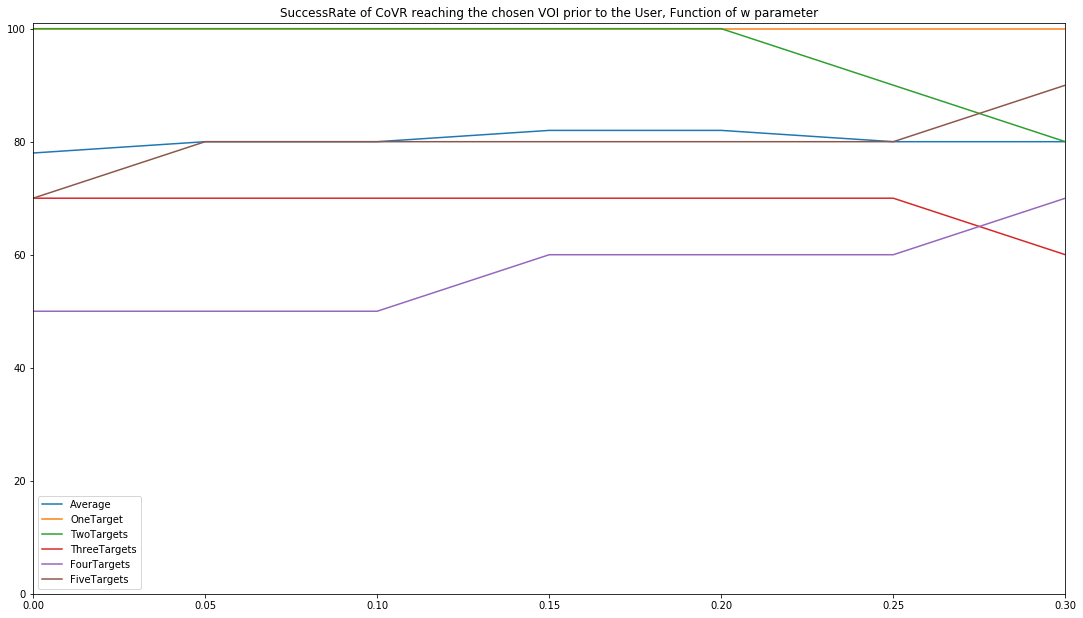

In [94]:
#fig, axis = plt.subplots()
newPD.plot(figsize = (18.5, 10.5), legend = True, ylim = (0,101), title = "SuccessRate of CoVR reaching the chosen VOI prior to the User, Function of w parameter")
#x = "w - Contribution of Distance over Angle", y = "Success Rate"
plt.savefig('./SummarySimulation/'+ name +'_AllTargets_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
#fig.set_size_inches(18.5, 10.5)

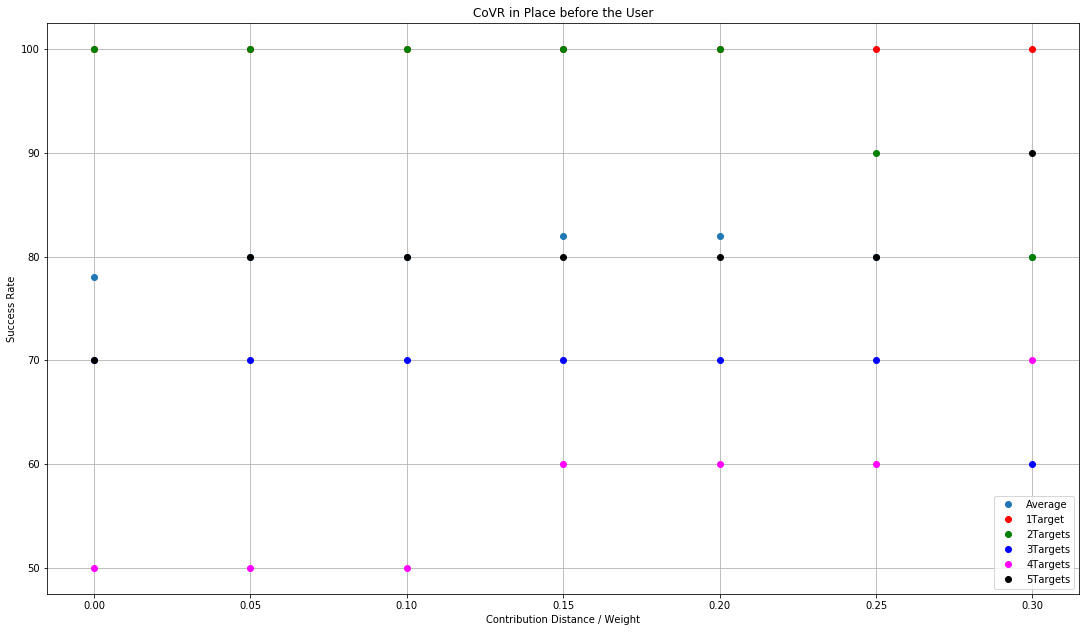

In [95]:
fig, axis = plt.subplots()
axis.set_xlabel('Contribution Distance / Weight')
axis.set_ylabel('Success Rate')
axis.set_title('CoVR in Place before the User')
axis.grid(True)
x = oneTargetSummary.index
y = summaryPd['SuccessRate']


t = summaryPd.index
plt.plot(t, summaryPd['SuccessRate'], 'o', label = 'Average')
#summaryPd['SuccessRate'].plot(kind = 'bar')
l = oneTargetSummary['SuccessRate']
plt.plot(t, l, 'o', color = 'red', label = '1Target')
m = twoTargetSummary['SuccessRate']
plt.plot(t, m, 'o', color = 'green', label = '2Targets')
n = threeTargetSummary['SuccessRate']
plt.plot(t, n, 'o', color = 'blue', label = '3Targets')
p = fourTargetSummary['SuccessRate']
plt.plot(t, p, 'o', color = 'magenta', label = '4Targets')
q = fiveTargetSummary['SuccessRate']
plt.plot(t, q, 'o', color = 'black', label = '5Targets')
#oneTargetSummary['SuccessRate'].plot.bar()
#axis.scatter(x,y)
fig.set_size_inches(18.5, 10.5)

fig.savefig('./SummarySimulation/'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
axis.legend()
plt.show() 

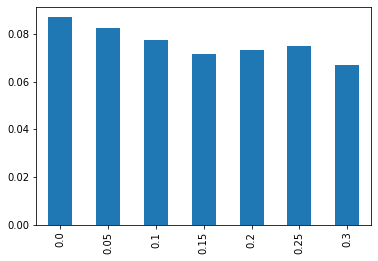

In [96]:
summaryPd['MeanDistanceTarget'].plot.bar()#yerr = summaryPd['StdDistanceTarget']/2)
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MeanDistanceToTarget.png')


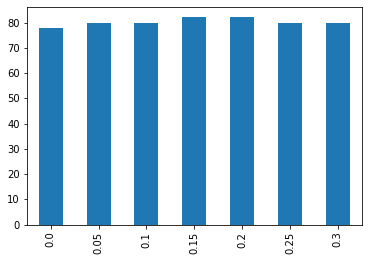

In [97]:
summaryPd['SuccessRate'].plot.bar()
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_BarChart-MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
